# Statistics, Visualization, Correlation

Today, we will continue our discussion of data exploration, and look for variables which co-occur together (*correlated variables*).

# Table of contents
[1. Data Exploration and Statistics](#1.-Data-Exploration-and-Statistics)
- mean, meadian, standard deviation
- histograms, scatterplots

[2. Correlation](#1.-Correlation)

# 1. Data Exploration and Statistics

Our dataset is enormous - it is difficult to understand the data we have available just by looking at the Data Frame. 

Data Scientists and AI researchers start every project with *data exploration* - plotting and summarizing various attributes of the data to get a better idea of what the data looks like.

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
# this library provides functions for performing statistics on data
import scipy.stats as stats
import pandas as pd
import numpy as np
import sys

# we have created this library containing all the 
# functions that we created in previous notebooks
# you can examine it by looking at the ff_functions.py file
import ff_functions as fff

In [2]:
# Read in data
background = "../../ai4all_data/background.csv"
data_frame = pd.read_csv(background, low_memory=False)
data_frame = data_frame.set_index('challengeID')

Let's look at three variables:
* f2l1: Total household income before taxes/deductions (Year 1)
* f3l1: Total household income before taxes/deductions (Year 3)
* m5j1: Total household income before taxes/deductions (Year 9)

We're interested in understanding how income of families changes across the years. Let's start by looking at the mean and median of 

## 1.1. Histograms

In [3]:
incomes = fff.pick_ff_variables(data_frame, ["f2l1", "f3l1", "m5j1"], remove_nans=True, remove_negatives=True)

# Let's change the names of the columns so it's easier for us to work with the data
incomes.columns = ["Year_1_income", "Year_3_income", "Year_9_income"]

incomes.head()

Data frame with  892  rows and  3 columns.


,Year_1_income,Year_3_income,Year_9_income
challengeID,,,
4,31037.239985,49894.100586,52330.093001
9,23437.652319,24955.283838,51248.022497
11,19508.401102,40362.995906,26853.171229
13,26212.061488,18347.662082,9679.511515
22,44228.967925,32289.146143,21674.654791


First, let's plot a histogram of the income.

We included the following function in the **`ff_functions.py`** file.

Do not worry about understanding the function in detail now - you can always revisit it if you want to modify anything.

In [4]:
'''
Plot a histogram based on a DataFrame "data"

Input arguments:

Required:
data: the pandas DataFrame to be plotted

Additional (with default values filled in):
labels: a list of labels for each column of the DataFrame
xlabel: label for the x axis
ylabel: label for the y axis
title: plot title

Output: 
Histogram plotted directly in notebook
'''
def plot_histogram(data, labels=[], xlabel="", ylabel="", title=""):
    
    # Set the ranges for X and Y coorinates to be the lowest and highest values observed
    max_val = int(np.max(data.values))
    min_val = int(np.min(data.values))
    
    # choose ranges into which we'll "bin" (count) occurences of variables
    bins = np.linspace(min_val, max_val, min(max_val-min_val,50))
    
    # set figure size
    fig = plt.figure(figsize=(7,7))
    
    # two options for dataframes with one vs more than one column
    if len(data.shape) > 1:
        for i,column in enumerate(data.columns):
            # build the histogram from a given column, bin it
            # set how "see-though" it is (alpha parameters)
            # set the label which will be displayed witht his histogram
            plt.hist(data[column], bins, alpha=1/len(data.shape), label=labels[i])
    else:
        plt.hist(data.values, bins, alpha=0.5, label=labels[0])
        
    # Set x and y corrdinates labels, title    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # put the legend in the upper right corner
    plt.legend(loc="upper right")

Since we called

**`import ff_functions as fff`**

below, and the function is present in the file, we can now call the function directly from the file:

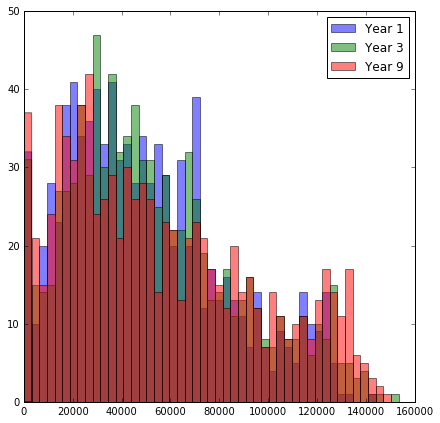

In [5]:
fff.plot_histogram(incomes, labels=["Year 1", "Year 3", "Year 9"])

You can see that most families are concentrated between 30,000 and 60,000, but some go as far as 160,000. 

We can also view incomes in different years one by one:

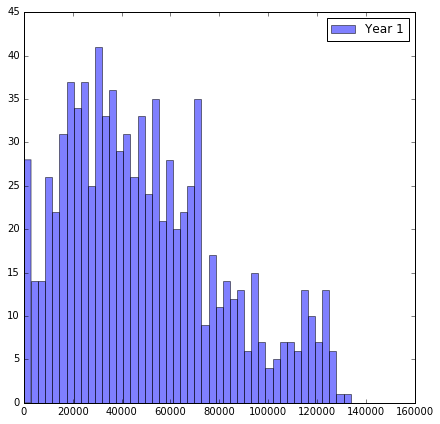

In [6]:
fff.plot_histogram(incomes.Year_1_income, labels=["Year 1"])

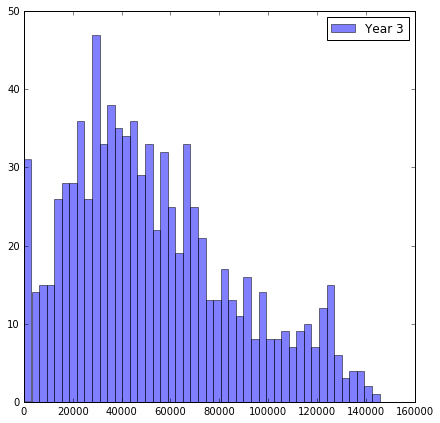

In [7]:
fff.plot_histogram(incomes.Year_3_income, labels=["Year 3"])

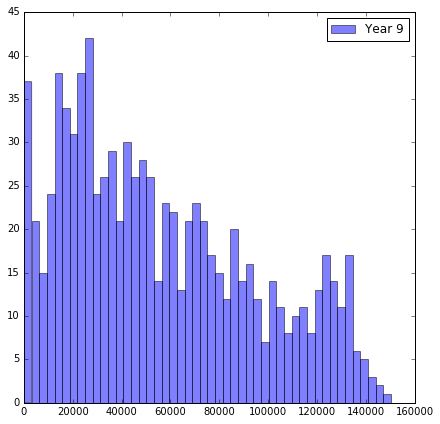

In [8]:
fff.plot_histogram(incomes.Year_9_income, labels=["Year 9"])

## 1.2 Mean and Median 
 
### Question 1.2.1: 
Looking at the shapes of the histograms, what do you think the means and medians will be for each? How did the incomes change across the years?
### Answer:

We can use the pandas mean and median functions to calculate the values.

In [9]:
### TODO: consider changing this to an exercise to google functions
incomes.mean()

Year_1_income    49595.675268
Year_3_income    53186.063011
Year_9_income    55926.737885
dtype: float64

In [10]:
### TODO: consider changing this to an exercise to google functions
incomes.median()

Year_1_income    44084.943356
Year_3_income    46932.836165
Year_9_income    47707.741682
dtype: float64

### Question 1.2.1: 
Do you see a pattern, when comparing the mean and median values across the three years?

(Hint: look at the histograms again).

### Answer:

In [11]:
# TODO: Answer: what I mean is for students to observe that median is lower than mean because distributions
# are skewed to the left

One of the more common mistakes in data science is trusting the mean value too much. It is a mistake often made when reporting typical incomes in a country. Reporting a mean value averages out many lower earners and fewer higher earners and produces an unrepresentative in-between value. 
Often, knowing the median can help us get a better idea of what is a "typical", or most common, wage.

## 1.3 Standard Deviation
Standard deviation is a measure that is used to quantify the amount of variation or dispersion of a set of data values. Together with the mean and median, it can help us quantify the distribution of the data.

Low standard deviation means all values lie relatively close to the mean. High standard deviation means many values lie very far away from the mean.

In [12]:
incomes.std()

Year_1_income    31679.714645
Year_3_income    33792.459173
Year_9_income    38785.639411
dtype: float64

### Question 1.3.1: 
What trend do you see in the consecutive standard deviations as years progress? What does this mean about the wage gap?

(Hint: look at the histograms again).

### Answer:

## 1.4 Outliers
However well we define our data, there may always be examples unlike any others. We call those "outliers".

There aren't clear outliers in our data, but let's try adding one and see how it influences the mean and the median.

In [13]:
# add new data point with much higher income
df2 = pd.DataFrame([[200000, 200000, 200000]], columns=incomes.columns)
df2

,Year_1_income,Year_3_income,Year_9_income
0,200000,200000,200000


In [14]:
incomes_with_outlier = incomes.append(df2)
incomes_with_outlier.tail()

,Year_1_income,Year_3_income,Year_9_income
4224,13086.969351,0.000000,25537.123873
4229,47522.704360,49888.399071,88714.469289
4234,31638.940484,27530.275347,64400.912510
4239,2678.615872,8747.037075,28213.337679
0,200000.000000,200000.000000,200000.000000


In [15]:
# TODO: Answer: As the years grow, the wage gap in this population increases.

### Problem 1.4.2
- Plot the histograms for all three years again
- recalculate the mean, median and standard deviation
- what do you observe? What does it say about the impact of outliers in mean, median and standard deviation values?

### Answer:

incomes mean
 Year_1_income    49595.675268
Year_3_income    53186.063011
Year_9_income    55926.737885
dtype: float64
mean with outlier
 Year_1_income    49764.101164
Year_3_income    53350.468315
Year_9_income    56088.074125
dtype: float64
incomes median
 Year_1_income    44084.943356
Year_3_income    46932.836165
Year_9_income    47707.741682
dtype: float64
median with outlier
 Year_1_income    44141.035201
Year_3_income    46945.726010
Year_9_income    47828.754365
dtype: float64
incomes standard deviation
 Year_1_income    31679.714645
Year_3_income    33792.459173
Year_9_income    38785.639411
dtype: float64
standard deviation with outlier
 Year_1_income    32059.494477
Year_3_income    34128.977367
Year_9_income    39062.560067
dtype: float64


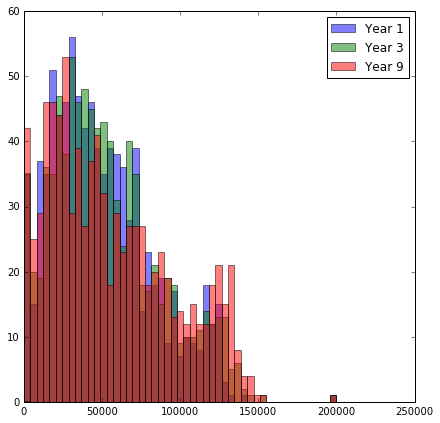

In [16]:
######### TODO: remove this (this is the solution) ###########
fff.plot_histogram(incomes_with_outlier, labels=["Year 1", "Year 3", "Year 9"])
print("incomes mean\n", incomes.mean())
print("mean with outlier\n", incomes_with_outlier.mean())
print("incomes median\n", incomes.median())
print("median with outlier\n", incomes_with_outlier.median())
print("incomes standard deviation\n", incomes.std())
print("standard deviation with outlier\n", incomes_with_outlier.std())
######### TODO: remove this (this is the solution) ###########

# 2. Correlation

## 2.1. Scatterplots
Scatter plots are graphs in which the values of two variables are plotted along two axes, the pattern of the resulting points revealing any correlation present.

We can visualize the changes of single family's income across any two years with a scatterplot.

Let's compare how the income changed between years 1 and 3 and years 1 and 9.

### Question 2.1.1.
How do you expect families' incomes to change across these two time frames?

### Answer:



Let's use a scatteplot function we define in the **`ff_functions.py`**  file:

In [17]:
'''
This function takes in two arrays of equal length (xdata, ydata)
and plots them against each other in a scatterplot

Input arguments:

Required:
xdata: a column of a Pandas DataFrame, data to be plotted against the x axis
ydata: a column of a Pandas DataFrame, data to be plotted against the y axis
(must be same length as xdata)

Additional (with default values filled in):
xlabel: label for the x axis (string)
ylabel: label for the y axis (string)
title: plot title (string)
plot_diagonal: if true (boolean)


Output: 
Scatterplot plotted directly in notebook
'''
def scatterplot(xdata, ydata, xlabel="", ylabel="", title="", plot_diagonal=False):
    
    # start new figure with sizes 7, 7 (try changing the numbers
    # to see the impact on the size of printed plot)
    fig = plt.figure(figsize=(7,7))
    
    # set the ranges for x and y axes to be between
    # the minimum value and the maximum value
    # (with an additional margin of 1 on each side for clarity)
    plt.xlim(min(xdata)-1,max(xdata)+1)
    plt.ylim(min(ydata)-1,max(ydata)+1)
    
    if plot_diagonal:
        x = np.linspace(min(xdata)-1,max(xdata)+1, 100)
        plt.plot(x, x)
    
    # plot the data
    plt.scatter(xdata, ydata)
    
    # set the selected labels for x and y axes, and title (empty by default)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

We saved this function in the ff_functions file as well, so you can call it directly from the file now:

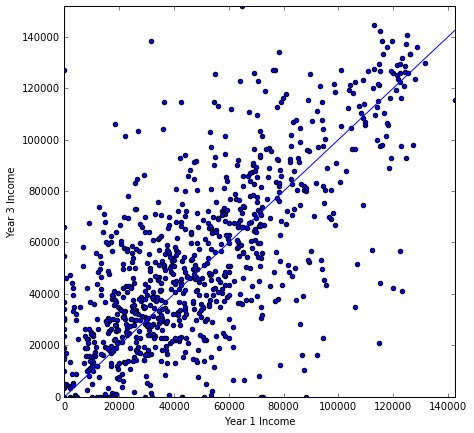

In [21]:
fff.scatterplot(incomes.Year_1_income, incomes.Year_3_income, xlabel = "Year 1 Income", ylabel = "Year 3 Income", \
                plot_diagonal = True)

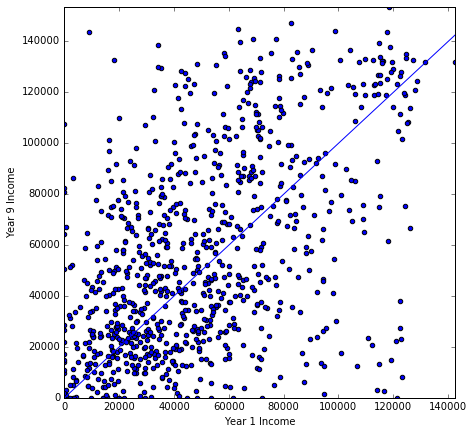

In [22]:
fff.scatterplot(incomes.Year_1_income, incomes.Year_9_income, xlabel = "Year 1 Income", ylabel = "Year 9 Income", \
               plot_diagonal = True)

Notice the diagonal line we drew - the points lying along the diagonal are families whose income did not change between the years. **(Why?)**

The points below the diagonal represent families whose income *decreased* between the plotted years.

The points above the diagonal represent families whose income *increased* between the plotted years.

### Question 2.1.2: 
How do you interpret these two plots? How does the income distribution change between years 1 and 3 vs years 1 and 9?

(Hint: use the plotted diagonal to talk about the increase/decrease in wages across years.)
### Answer:

In [ ]:
### TODO - remove this (answer) ####

# Between years 2 and 3, more points lie closely to the diagonal
# this means their income changed little - this makes sense, since only 2 years passed.
# We also see a couple of families whose income increased or decreased a lot

# Between years 2 and 9, points lie more far away from the diagonal
# this means families' income changed more - this makes sense, since 8 years passed.
# There about as many (???) families whose income increased as those whose income decreased.

####################################

## 2.2 Correlation

If you look at the plots above, you will see that there seems to be a relationship between the Incomes in consecutive years.

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. A positive correlation means that as you increase one of the variables, you would expect the second variable to increase too. A negative correlation means that as you increase one of the variables, you would expect the second variable to decrease.

### Question 2.2.1
Do we observe a correlation in the scatterplots above? Which of the two plots shows a stronger correlation? Why?

### Answer:

We can compute the correlation by using the numpy corrcoef function which computes the **Pearson correlation coefficient**. The result is a number that lies between -1 and 1. -1 means that the variables are very strongly correlated in a negative way, 1 means that the variables are very strongly related in a positive way, and 0 means that the variables are not correlated with each other.

*Note that the Pearson correlation is a linear correlation measure (only tells you about whether a line in a scatter plot captures the relationship between the variables) and does not provide information on any nonlinear relationship there might exist between the two variables.* (More on that later)

In [23]:
# corrcoef returns what is known as the Pearson product-moment correlation coefficients. The correlation between the two
# variables is equal to the non-diagonal entries of the array.

Pearson_corr = incomes[["Year_1_income", "Year_3_income"]].corr()
# Pearson_corr = np.corrcoef(incomes.Year_2_income, incomes.Year_3_income)
print(Pearson_corr)

# select a diagonal element
income_corr1_3 = Pearson_corr.iloc[0,1] # or equivalently Pearson_corr[1,0]

Pearson_corr = incomes[["Year_1_income", "Year_9_income"]].corr()
print(Pearson_corr)

# select a diagonal element
income_corr1_9 = Pearson_corr.iloc[0,1] # or equivalently Pearson_corr[1,0]

print("Correlation between Incomes in Years 1 and 9: {0}".format(income_corr1_3))
print("Correlation between Incomes in Years 1 and 3: {0}".format(income_corr1_9))


               Year_1_income  Year_3_income
Year_1_income       1.000000       0.705298
Year_3_income       0.705298       1.000000
               Year_1_income  Year_9_income
Year_1_income       1.000000       0.511048
Year_9_income       0.511048       1.000000
Correlation between Incomes in Years 1 and 9: 0.7052979846390245
Correlation between Incomes in Years 1 and 3: 0.5110476536730735


### Question 2.2.1:
Interpret the different correlation values. What do they mean about the relationships between incomes in different years?
### Answer:

## 2.3 Correlation Matrices

We can visualize a correlation matrix of all the variables in a given dataframe using the following function (also defined in **`ff_functions.py`**)

In [24]:
'''
This function takes in a DataFrame and returns a correlation matrix heatmap for all variables
present in the frame.

Input arguments:

Required:
frame: a Pandas DataFrame, containing features whose correlations we're interested in

Output: 
Heatmap-colored correlation plot
'''
def get_corr_plot(frame):
    
    # calculate the correlations between all variables in the frame
    correlations = frame.astype(float).corr()
    
    # plot the figure
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    # set the color scale
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)

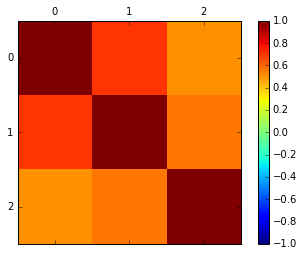

In [25]:
fff.get_corr_plot(incomes)

The axes indices in the correlation plot correspond to the column indices in the provided dataframe.

### Question 2.3.1:
The diagonal entries show correlation=1. Why?

### Answer: